In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AmesHousing.csv to AmesHousing.csv


In [ ]:
data = pd.read_csv('AmesHousing.csv')
data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [ ]:
# Step 3: Data Preprocessing
# Check for missing values
print(data.isnull().sum())


Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


In [ ]:
# List all column names
print("Column names in the dataset:")
print(data.columns)

Column names in the dataset:
Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage T

In [ ]:
# Remove rows with NaN values if any
data = data.dropna(subset=['Gr Liv Area', 'SalePrice'])

In [ ]:
# Select the feature (GrLivArea) and the target variable (SalePrice)
X = data[['Gr Liv Area']]  # Feature: above ground living area square feet
y = data['SalePrice']    # Target variable: sale price

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create the linear regression model
model = LinearRegression()

In [ ]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the mean squared error and the R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3821184066.2726417
R-squared: 0.5233974153691151


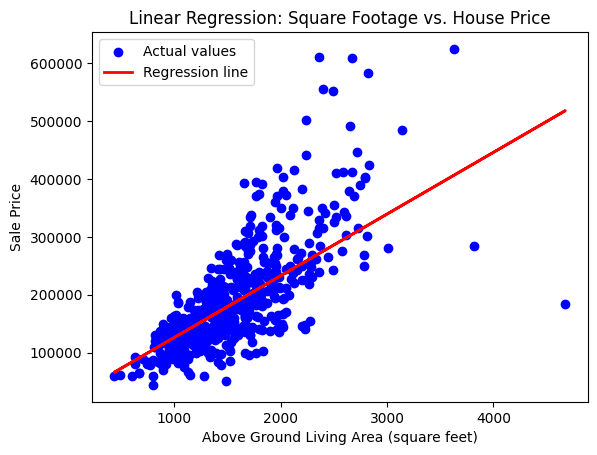

In [ ]:
# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Above Ground Living Area (square feet)')
plt.ylabel('Sale Price')
plt.title('Linear Regression: Square Footage vs. House Price')
plt.legend()
plt.show()

In [ ]:
!git config --global user.name "mihirgharat21"
!git config --global user.email "gharatmihir31@gmail.com"


In [ ]:
!git clone https://github.com/mihirgharat21/AmesHousing.git

Cloning into 'AmesHousing'...


In [ ]:
!rm -rf AmesHousing


In [ ]:
# Move your code file to the repository directory
!mv AmesHousing.ipynb house-price-prediction/

mv: cannot stat 'AmesHousing.ipynb': No such file or directory


In [ ]:
!git add .

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [ ]:
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/mihirgharat21/AmesHousing.git
!git push -u origin main

fatal: pathspec 'README.md' did not match any files
On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	AmesHousing.csv
	AmesHousing/
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/mihirgharat21/AmesHousing.git'


In [ ]:
!git add AmesHousing.csv
!git commit -m "first commit"

[main (root-commit) 7408588] first commit
 1 file changed, 2931 insertions(+)
 create mode 100644 AmesHousing.csv


In [ ]:
!git branch -M main
!git push -u origin main

fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!git status

On branch main
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	AmesHousing/
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
!git add .

error: 'AmesHousing/' does not have a commit checked out
fatal: adding files failed


In [ ]:
!git add AmesHousing/AmesHousing.ipynb

fatal: pathspec 'AmesHousing/AmesHousing.ipynb' did not match any files


In [ ]:
ls

AmesHousing/  AmesHousing.csv  sample_data/


In [ ]:
cd AmesHousing/

/content/AmesHousing


In [ ]:
cd ../..


/


In [ ]:
ls


bin@                        datalab/  kaggle/  libx32@                   opt/   sbin@  tools/
boot/                       dev/      lib@     media/                    proc/  srv/   usr/
content/                    etc/      lib32@   mnt/                      root/  sys/   var/
cuda-keyring_1.0-1_all.deb  home/     lib64@   NGC-DL-CONTAINER-LICENSE  run/   tmp/


In [ ]:
cd home

/home


In [ ]:
ls